In [ ]:
'''
Ana T: 

100% / 100% / 95% 

'''


## MNS Computer Practical 4
#### Quinten De Block and Gonzalo Cardenal

#### 2. Numerical solutions to ODEs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate, arange

In [ ]:
def euler(f_func, x_0, t_max, dt, I = None):
  x = np.zeros(np.int64(t_max//dt))
  t = np.arange(0,t_max,dt)
  x[0] = x_0
  if I is None:
    for i in range(0,np.int64(t_max/dt)-2):
      x[i+1]=x[i]+f_func(x[i],t[i])*dt
    return x,t
  else:
    for i in range(0,np.int64(t_max/dt)-2):
      x[i+1]=x[i]+f_func(x[i],t[i], I[i])*dt 
    return x,t 

In [ ]:
def func_1num(x,t):
    return -x

def func_2num(x,t):
    return x**(-1)

def func_3num(x,t):
    return 1-x

def func_4num(x,t):
    return x*(1-x)

#Now we define now the analytical solutions of our ODEs
def func_1ana(t):
    return np.exp(-t)

def func_2ana(t):
    return np.sqrt(2*t+1)

def func_3ana(t):
    return -np.exp(-t) + 1

def func_4ana(t):
    return np.exp(t)/(np.exp(t)+1)

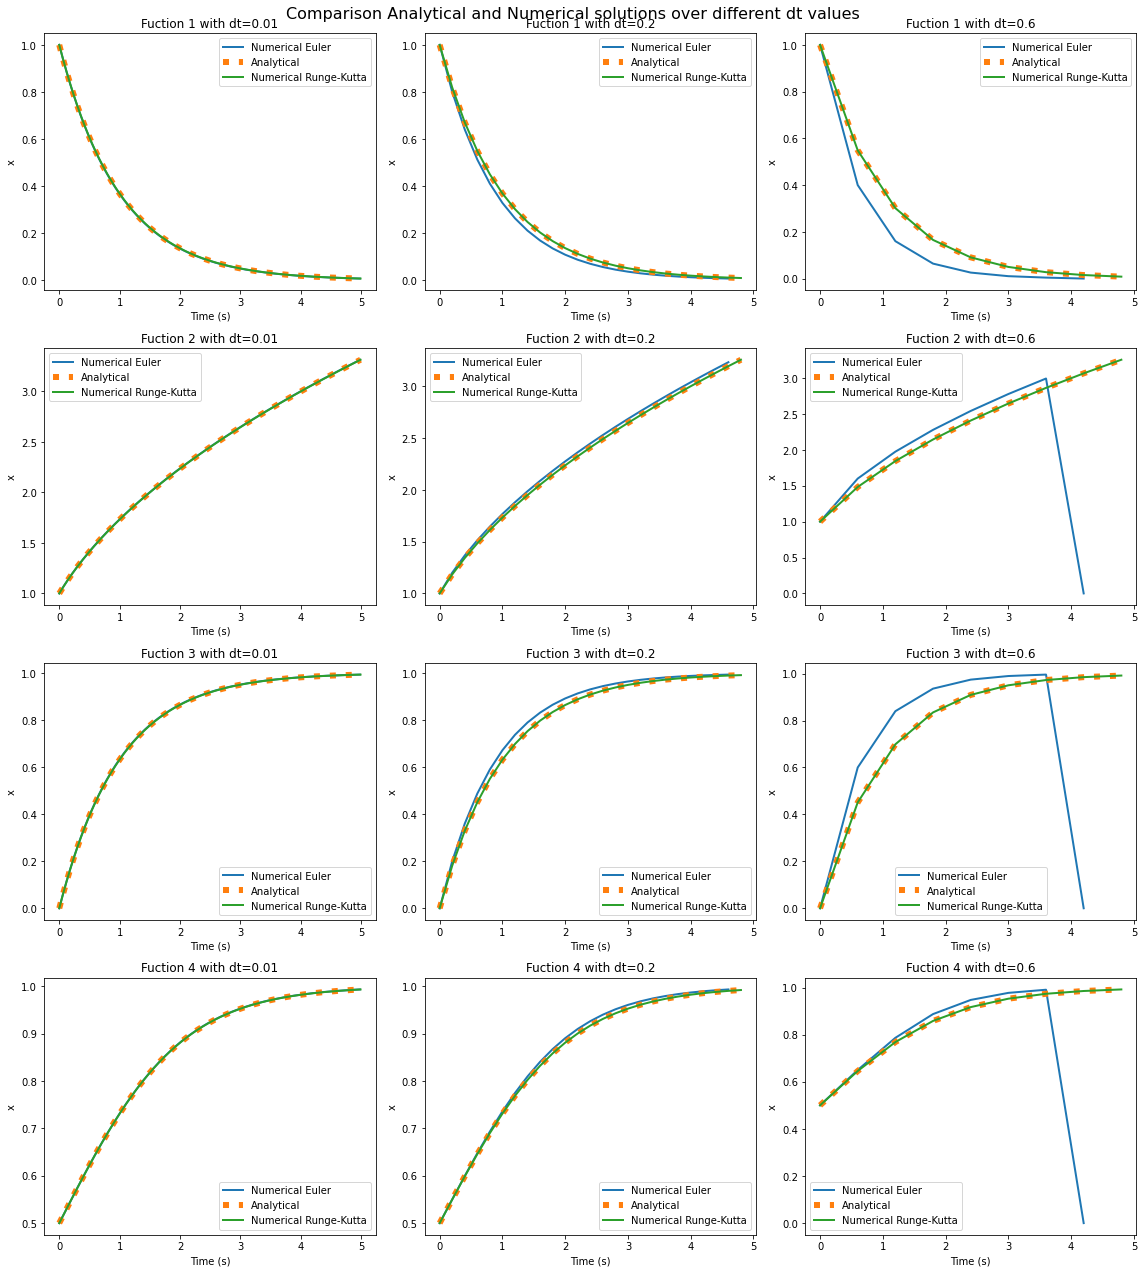

In [ ]:
#numerical Euler method defining ODE
dts=[0.01, 0.2, 0.6]

fig, axs = plt.subplots(4, 3, figsize = (16,18))
plt.suptitle("Comparison Analytical and Numerical solutions over different dt values", fontsize = 16)
#First function
for i in range(0,3):
    xnum1,t = euler(func_1num, 1, 5, dts[i])
    xana1 = func_1ana(t)
    xrkmeth1 = integrate.odeint(func_1num, 1, t)
    axs[0, i].plot(t[:-1], xnum1, label = "Numerical Euler", linewidth= 2)
    axs[0, i].plot(t, xana1, label= "Analytical",linestyle="dotted", linewidth= 6)
    axs[0, i].plot(t, xrkmeth1, label= "Numerical Runge-Kutta", linewidth= 2)
    axs[0, i].set_title(rf"Fuction 1 with dt={dts[i]}")
    axs[0, i].set_xlabel('Time (s)')
    axs[0, i].set_ylabel('x')
    axs[0, i].legend()

#Second Fuction    
for i in range(0,3):
    xnum2,t = euler(func_2num, 1, 5, dts[i])
    xana2 = func_2ana(t)
    xrkmeth2 = integrate.odeint(func_2num, 1, t)
    axs[1, i].plot(t[:-1], xnum2, label = "Numerical Euler", linewidth= 2)
    axs[1, i].plot(t, xana2, label= "Analytical",linestyle="dotted", linewidth= 6)
    axs[1, i].plot(t, xrkmeth2, label= "Numerical Runge-Kutta", linewidth= 2)
    axs[1, i].set_title(rf"Fuction 2 with dt={dts[i]}")
    axs[1, i].set_xlabel('Time (s)')
    axs[1, i].set_ylabel('x')
    axs[1, i].legend()

#Third Fuction
for i in range(0,3):
    xnum3,t = euler(func_3num, 0, 5, dts[i])
    xana3 = func_3ana(t)
    xrkmeth3 = integrate.odeint(func_3num, 0, t)
    axs[2, i].plot(t[:-1], xnum3, label = "Numerical Euler", linewidth= 2)
    axs[2, i].plot(t, xana3, label= "Analytical",linestyle="dotted", linewidth= 6)
    axs[2, i].plot(t, xrkmeth3, label= "Numerical Runge-Kutta", linewidth= 2)
    axs[2, i].set_title(rf"Fuction 3 with dt={dts[i]}")
    axs[2, i].set_xlabel('Time (s)')
    axs[2, i].set_ylabel('x')
    axs[2, i].legend()

#Fourth Fuction
for i in range(0,3):
    xnum4,t = euler(func_4num, 0.5, 5, dts[i])
    xana4 = func_4ana(t)
    xrkmeth4 = integrate.odeint(func_4num, 0.5, t)
    axs[3, i].plot(t[:-1], xnum4, label = "Numerical Euler", linewidth= 2)
    axs[3, i].plot(t, xana4, label= "Analytical",linestyle="dotted", linewidth= 6)
    axs[3, i].plot(t, xrkmeth4, label= "Numerical Runge-Kutta", linewidth= 2)
    axs[3, i].set_title(rf"Fuction 4 with dt={dts[i]}")
    axs[3, i].set_xlabel('Time (s)')
    axs[3, i].set_ylabel('x')
    axs[3, i].legend()
fig.tight_layout()

As we can see from the previous plot at 3 different step sizes, with small step sizes the Numerical Euler method give us a good approximation of the analytical ODE solution. However, at big step size the numerical fuction given by Euler method diverge more and does not give a good approximation at certain times.
For the Runge-Kutta method this change, even for big step sizes it continues giving good approximation.

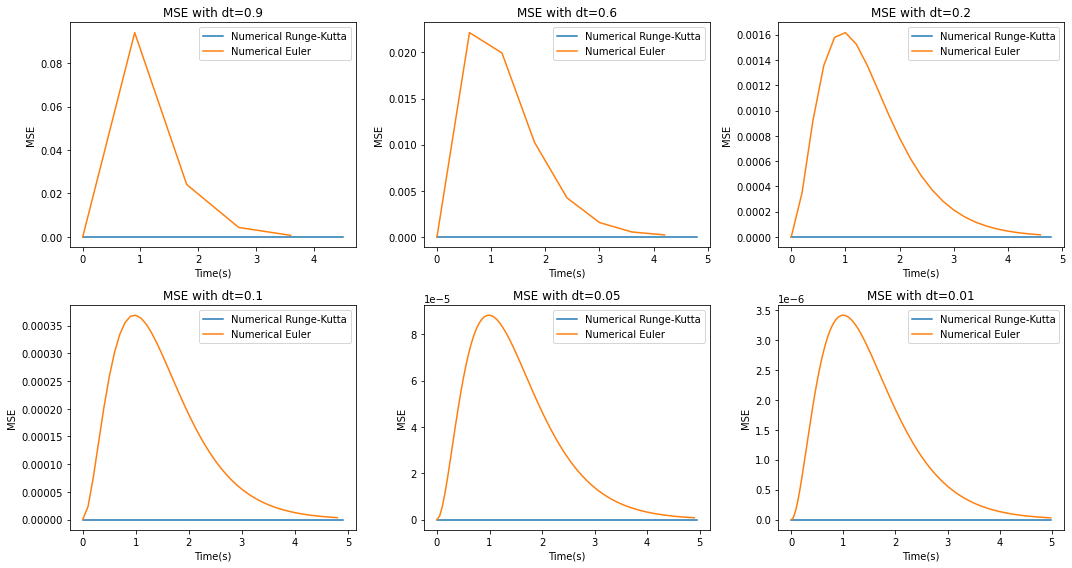

In [ ]:
# Now we plot errors for function 2 with different dt

ndts=[0.9, 0.6,0.2, 0.1, 0.05, 0.01]
num = 0

fig, ax = plt.subplots(figsize= (15, 8), nrows=2, ncols=3)

for i in range(0,2):
    for j in range (0,3):
        
        xnum1,t = euler(func_1num, 1, 5, ndts[num])
        xana1 = func_1ana(t)
        xrkmeth1 = integrate.odeint(func_1num, 1, t)

        mse_num1=(xana1[:-1] - xnum1)**2
        mse_rkmeth1=(xana1 - xrkmeth1.T)**2
        
        ax[i][j].plot(t, mse_rkmeth1.T, label ="Numerical Runge-Kutta")
        ax[i][j].plot(t[:-1], mse_num1, label ="Numerical Euler")
        
        ax[i][j].set_xlabel("Time(s)")
        ax[i][j].set_ylabel("MSE")
        ax[i][j].set_title(rf"MSE with dt={ndts[num]}")
        ax[i][j].legend()
        
        num += 1 
        
fig.tight_layout()       

As we could expect from the results previosly obtained, in Euler method for smaller time step the MSE is smaller and convergence is better. In the other hand, the function obtained with the Runge-Kutta method fits the analytical solution perfect even for big step sizes dt=0.9. Thus, the Runge-Kutta method is better to represent an ODE numerically.

In [ ]:

'''

Great plots!!

'''


#### 3.Passive membrane

##### a)Euler method in constant current

In [ ]:
Rm = 10**7
I1 = 10**-9
taum = 10*10**-3
Em = -80*10**-3

In [ ]:
def passmembeq(V,t,I):
    return -V/taum + Em/taum + Rm*I/taum
dt=0.0001
t_max=0.5
t = np.arange(0,t_max,dt)

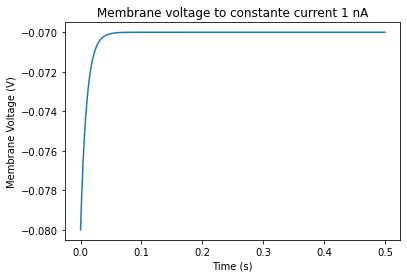

In [ ]:
V, t= euler(passmembeq,Em, t_max,dt, I = np.full(np.size(t),I1))

plt.plot(t[:-1],V[:]);
plt.xlabel("Time (s)")
plt.ylabel("Membrane Voltage (V)")
plt.title("Membrane voltage to constante current 1 nA");

In [ ]:
'''

Awesome! 
Just as a comment: It is common to represent the membrane potential in mV and the time in ms, to avoid the decimals.

'''

##### b)Sinusoidal time-dependent currrent

In [ ]:
def sinus(I0,v,t):
    return I0*np.sin(2*math.pi*v*t)

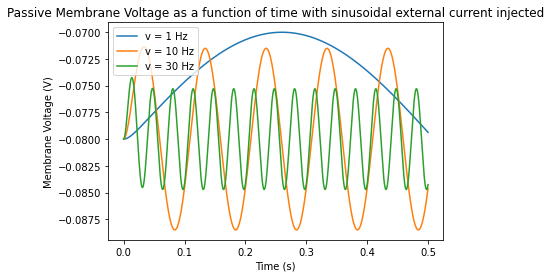

In [ ]:
I0 = 10**-9
for v in np.array([1,10,30]):
    t = np.arange(0,t_max,dt)
    I = sinus(I0,v,t)
    V2,t = euler(passmembeq,Em,t_max,dt, I)
    plt.plot(t[:-1],V2[:]);
plt.xlabel('Time (s)')
plt.ylabel('Membrane Voltage (V)')
plt.title('Passive Membrane Voltage as a function of time with sinusoidal external current injected')
plt.legend(['v = 1 Hz','v = 10 Hz','v = 30 Hz','']);

In [ ]:
'''

Which of the plots is the rescaled input, how can you compare the phase?

'''

##### c)Voltage amplitude and phase lag

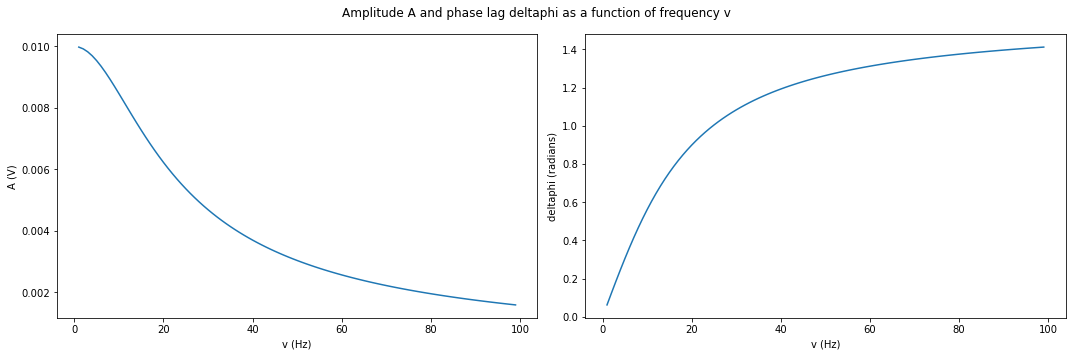

In [ ]:
A = np.zeros(np.size(np.arange(1,100)))
dphi = np.zeros(np.size(np.arange(1,100)))
for v in np.arange(1,100):
    A[v-1] = I0*Rm*np.sqrt(1/(1+(2*math.pi*v*taum)**2))
    dphi[v-1] = np.arctan(2*math.pi*v*taum)
fig, axs = plt.subplots(1, 2, figsize = (15,5))
axs[0].plot(np.arange(1,100), A)
axs[0].set_ylabel("A (V)")
axs[1].plot(np.arange(1,100), dphi)
axs[1].set_ylabel("deltaphi (radians)")
plt.suptitle("Amplitude A and phase lag deltaphi as a function of frequency v")
plt.setp(axs[:], xlabel='v (Hz)')
fig.tight_layout()

The voltage's amplitude will decrease with increasing value for the frequency v. The phase lag deltaphi will increase logarithmically with the driving frequency v untill the maximum value of pi/2.  

In [ ]:
'''

Great!
What can we say about the amplitude of the membrane?
Spoiler alert: It looks like a low pass filter. Allowing low frequencies to have a greater amplitude.

'''